In [1]:
import os
import tarfile
import zipfile
import urllib

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/" 
HOUSING_PATH = os.path.join('.', 'datasets', 'housing')
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:
# fetch data from api as tgz
# extract it to local storage
def fetch_housing_data(housing_url, housing_path):
    os.makedirs(housing_path, exist_ok = True)
    zipfile_path = housing_path + '/housing.tgz'
    urllib.request.urlretrieve(housing_url, zipfile_path)
    zipfile_ref = tarfile.open(zipfile_path)
    zipfile_ref.extractall(path = housing_path)
    zipfile_ref.close()

In [4]:
fetch_housing_data(HOUSING_URL, HOUSING_PATH)

In [5]:
import pandas as pd

# load data from csv to pandas
def load_housing_data(housing_path, housing_fn):
    csv_path = os.path.join(housing_path, housing_fn)
    return pd.read_csv(csv_path)

In [6]:
housing_data = load_housing_data(HOUSING_PATH, 'housing.csv')

In [7]:
housing_data.value_counts()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value  ocean_proximity
-114.31    34.19     15.0                5612.0       1283.0          1015.0      472.0       1.4936         66900.0             INLAND             1
-121.20    39.25     5.0                 906.0        144.0           376.0       141.0       4.3523         188200.0            INLAND             1
           38.67     26.0                1546.0       287.0           773.0       299.0       2.9803         115400.0            INLAND             1
           38.68     9.0                 2200.0       422.0           938.0       369.0       3.4896         143800.0            INLAND             1
           38.69     26.0                3077.0       607.0           1603.0      595.0       2.7174         137500.0            INLAND             1
                                                                                                         

In [8]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


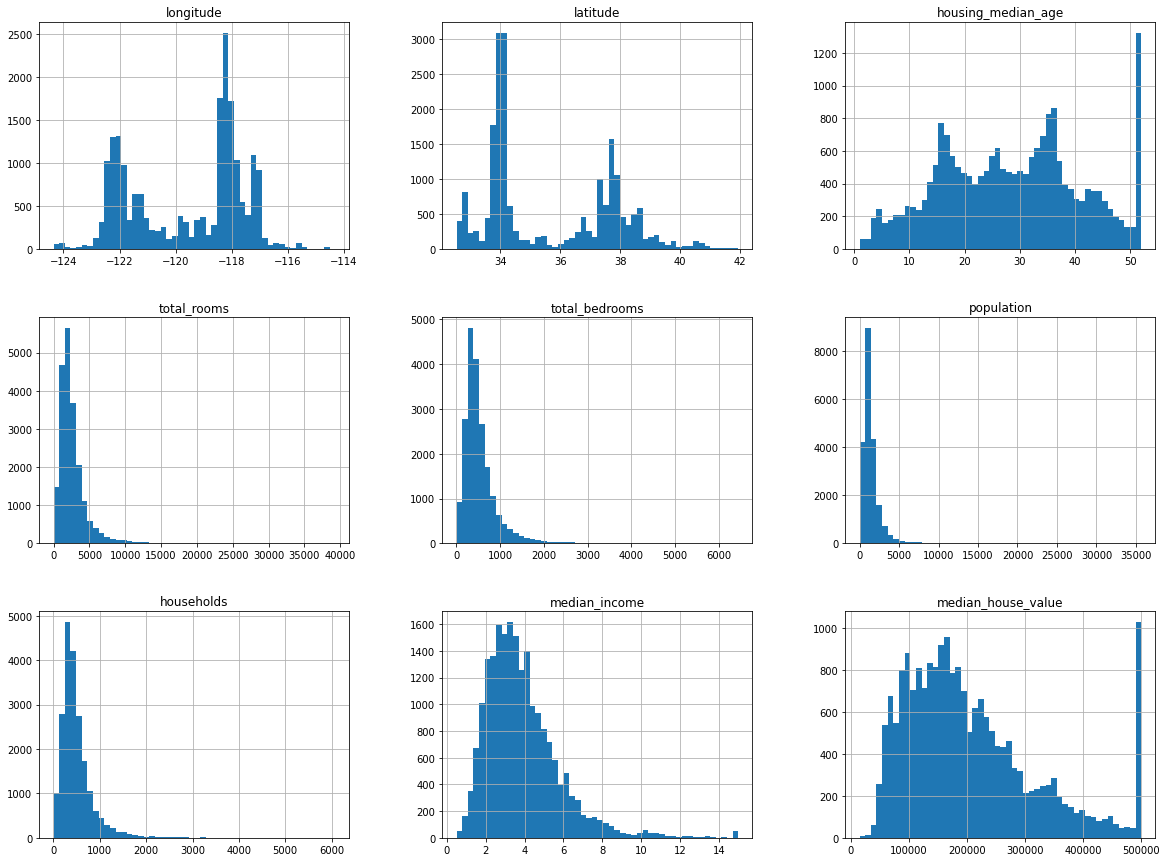

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

housing_data.hist(figsize=(20, 15), bins=50)
plt.show()

In [10]:
# first method to split train test set
import numpy as np

def train_test_split(data, test_ratio):
    np.random.seed(43)
    
    len_data = len(data)
    perm = np.random.permutation(len_data)
    
    return data.iloc[perm[:int(len_data*(1-test_ratio))]], data.iloc[perm[int(len_data*(1-test_ratio)):]]

train_data, test_data = train_test_split(housing_data, 0.2)

print(train_data.shape)
print(test_data.shape)

print(f'first train data \n{train_data.iloc[0]}')
print(f'first test data \n{test_data.iloc[0]}')

(16512, 10)
(4128, 10)
first train data 
longitude               -118.19
latitude                  33.99
housing_median_age           36
total_rooms                1273
total_bedrooms              379
population                 1398
households                  353
median_income            2.4516
median_house_value       147800
ocean_proximity       <1H OCEAN
Name: 7310, dtype: object
first test data 
longitude                -118.17
latitude                   33.79
housing_median_age            30
total_rooms                 1349
total_bedrooms               519
population                  2646
households                   552
median_income             1.9318
median_house_value        115900
ocean_proximity       NEAR OCEAN
Name: 8209, dtype: object


In [11]:
# test method to split train test set
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier))&0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_:test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing_data.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')

print(train_set.shape)
print(test_set.shape)

print(f'first train data \n{train_set.iloc[0:10]}')
print(f'first test data \n{test_set.iloc[0:10]}')

(16512, 11)
(4128, 11)
first train data 
    index  longitude  latitude  housing_median_age  total_rooms  \
0       0    -122.23     37.88                41.0        880.0   
1       1    -122.22     37.86                21.0       7099.0   
3       3    -122.25     37.85                52.0       1274.0   
4       4    -122.25     37.85                52.0       1627.0   
6       6    -122.25     37.84                52.0       2535.0   
7       7    -122.25     37.84                52.0       3104.0   
8       8    -122.26     37.84                42.0       2555.0   
9       9    -122.25     37.84                52.0       3549.0   
10     10    -122.26     37.85                52.0       2202.0   
11     11    -122.26     37.85                52.0       3503.0   

    total_bedrooms  population  households  median_income  median_house_value  \
0            129.0       322.0       126.0         8.3252            452600.0   
1           1106.0      2401.0      1138.0         8.3014  

In [12]:
# third method for split train test set
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(
    housing_with_id, 
    test_size = 0.2,
    random_state = 43)

print(train_set.shape)
print(test_set.shape)

print(f'first train data \n{train_set.iloc[0]}')
print(f'first test data \n{test_set.iloc[0]}')

(16512, 11)
(4128, 11)
first train data 
index                       72
longitude              -122.29
latitude                 37.81
housing_median_age          49
total_rooms                844
total_bedrooms             204
population                 560
households                 152
median_income             1.75
median_house_value       75000
ocean_proximity       NEAR BAY
Name: 72, dtype: object
first test data 
index                      7310
longitude               -118.19
latitude                  33.99
housing_median_age           36
total_rooms                1273
total_bedrooms              379
population                 1398
households                  353
median_income            2.4516
median_house_value       147800
ocean_proximity       <1H OCEAN
Name: 7310, dtype: object


In [13]:
housing_data['income_cat'] = pd.cut(
    housing_data['median_income'],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1,2,3,4,5]
)

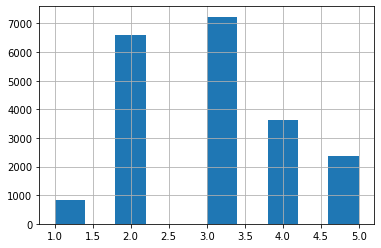

In [14]:
housing_data['income_cat'].hist()
plt.show()

In [15]:
print(housing_data['income_cat'].value_counts()/len(housing_data))

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64


In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

In [17]:
splitted = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

In [18]:
for train_index, test_index in splitted.split(housing_data, housing_data['income_cat']):
#     print(train_index)
    stra_train = housing_data.iloc[train_index]
    stra_test = housing_data.iloc[test_index]

In [19]:
# stra distribution
stra_train['income_cat'].value_counts()/len(stra_train)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [20]:
# orig distribution
housing_data['income_cat'].value_counts()/len(housing_data)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [21]:
train_set, test_set = train_test_split(
    housing_data, 
    test_size = 0.2,
    random_state = 43)

In [23]:
# split with out strat distribution
train_set['income_cat'].value_counts()/len(train_set)

3    0.351381
2    0.319828
4    0.175630
5    0.113372
1    0.039789
Name: income_cat, dtype: float64

## There is no significant the distribution of strat and normal random

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

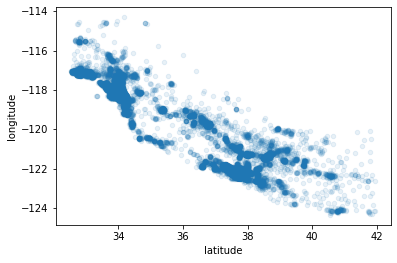

In [26]:
train_set.plot(kind='scatter', x='latitude', y = 'longitude', alpha = 0.1)